In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [16]:
import matplotlib as plt
%matplotlib inline
data = pd.read_csv('adult.data.txt', header=None)
data.columns = np.array(['age', 'workclass', 'fnlwg', 'education', 'education.num', 'marital.status', 
                         'occupation','relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 
                         'hours.per.week', 'native.country', 'income'])

In [18]:
print(set(data['income']))
data['income'] = data['income'].map({' <=50K': 0, ' >50K': 1}).astype(int)

print(set(data['occupation']))
data['occupation'] = data['occupation'].map({' ?': 0, ' Craft-repair': 1, ' Machine-op-inspct': 2,
                                             ' Tech-support': 3, ' Sales': 4, ' Farming-fishing': 5,
                                             ' Armed-Forces': 6, ' Priv-house-serv': 7, ' Other-service': 8,
                                             ' Transport-moving' : 9, ' Exec-managerial' : 10, ' Handlers-cleaners': 11,
                                             ' Prof-specialty': 12, ' Protective-serv': 13, ' Adm-clerical': 14}).astype(int)

print(set(data['sex']))
data['sex'] = data['sex'].map({' Male': 0, ' Female': 1}).astype(int)

print(set(data['race']))
data['race'] = data['race'].map({' White': 0, ' Black': 1, ' Amer-Indian-Eskimo': 2,
                                 ' Other': 3, ' Asian-Pac-Islander': 4}).astype(int)

{' >50K', ' <=50K'}
{' Male', ' Female'}
{' Other', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Black', ' White'}


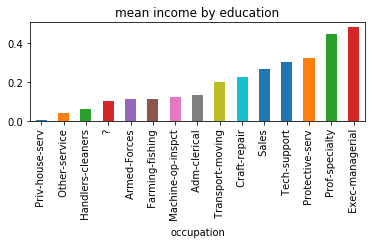

In [22]:
plt.pyplot.subplot(2, 1, 1)
data.groupby('occupation').income.mean().sort_values().plot(title='mean income by education', kind='bar');

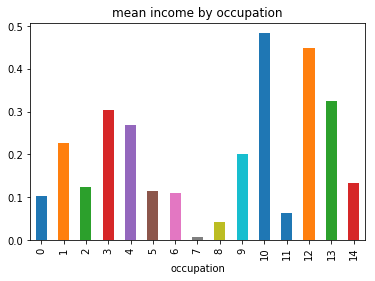

In [5]:
data.groupby('occupation').income.mean().plot(title='mean income by occupation', kind='bar');

In [7]:
from sklearn.model_selection import train_test_split

# X = data[['education.num', 'age', 'hours.per.week', 'capital.gain', 'occupation', 'sex']]
# y = data['income']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = SVC(kernel='rbf')
# model.fit(X_train, y_train)
# score = model.score(X_test, y_test)
# print(score)

In [8]:
from sklearn.ensemble import RandomForestClassifier

X = data[['education.num', 'age', 'hours.per.week', 'capital.gain', 'occupation', 'sex']]
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.812835866728


In [9]:
num_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

In [1]:
import seaborn as sns

corr = data.corr()
plt.pyplot.subplots(figsize=(12, 9))

k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'income')['income'].index

hm = sns.heatmap(np.corrcoef(data[cols].values.T), annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values, cmap='Blues')

NameError: name 'data' is not defined

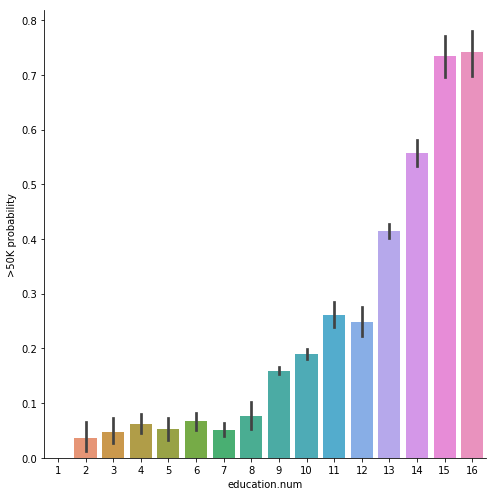

In [11]:
g = sns.factorplot(x='education.num', y='income', data=data, kind='bar', size = 7)
g = g.set_ylabels('>50K probability')

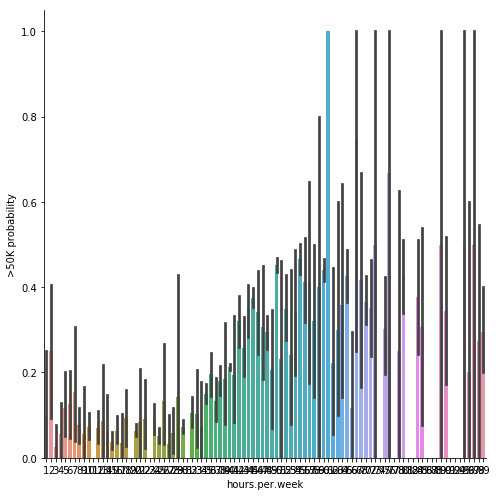

In [12]:
g = sns.factorplot(x='hours.per.week', y='income', data=data, kind='bar', size=7)
g = g.set_ylabels('>50K probability')

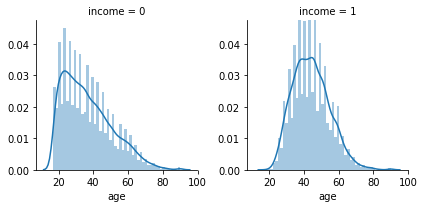

In [13]:
g = sns.FacetGrid(data, col='income')
g = g.map(sns.distplot, 'age')

In [14]:
data.isnull().sum()

age               0
workclass         0
fnlwg             0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

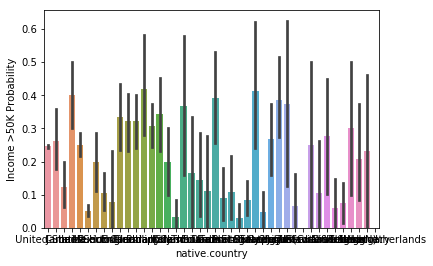

In [15]:
g = sns.barplot(x='native.country', y='income', data=data)
g = g.set_ylabel('Income >50K Probability')

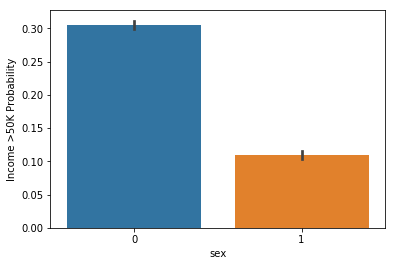

In [16]:
g = sns.barplot(x='sex', y='income', data=data)
g = g.set_ylabel('Income >50K Probability')

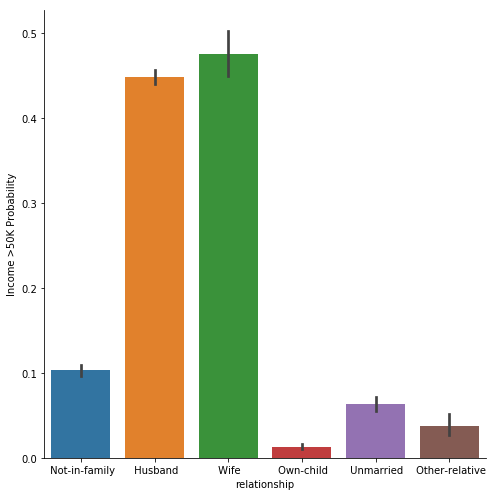

In [17]:
g = sns.factorplot(x='relationship', y='income', data=data, kind='bar', size = 7)
g = g.set_ylabels('Income >50K Probability')

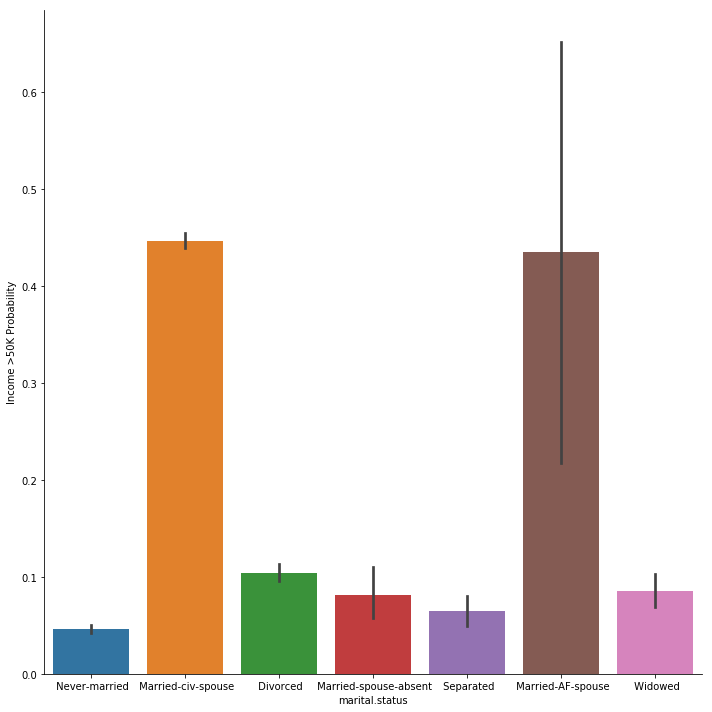

In [18]:
g = sns.factorplot(x='marital.status', y='income', kind='bar', size=10, data=data)
g = g.set_ylabels('Income >50K Probability')

In [19]:
tdata["marital.status"] = data["marital.status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
data["marital.status"] = data["marital.status"].map({"Married":1, "Single":0}).astype(int)

data['relationship'] = data['relationship'].replace([' Husband', ' Wife'], '1')
data['relationship'] = data['relationship'].replace([' Not-in-family', ' Own-child', ' Unmarried', ' Other-relative'], '0')
data['relationship'] = data['relationship'].map({'1': 1, '0': 0}).astype(int)

In [20]:
from sklearn.ensemble import RandomForestClassifier

# ['workclass']
y = data['income']
X = data[['race', 'fnlwg', 'marital.status', 'relationship', 'age', 'sex', 'hours.per.week', 'education.num', 'capital.gain', 'capital.loss']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=250, max_features=5)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)

0.847689236911


In [21]:
# from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train, y_train)

# score = model.score(X_test, y_test)
# print(score)

In [22]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.858744050361


In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.870259481038


In [24]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.794257638569


In [25]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.828496852449


In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(score)

0.811914632274
